In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('job_train.csv')

In [ ]:
df.sample(10)

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
6254,Web Designer,"GR, I, Athens",Workable is a company that cares about design ...,To be seriously considered you should be able ...,0,1,1,0
3705,Sales Development Rep,"US, NY, New York",Conversocial is a social customer service soft...,Skills/Qualifications:Degree level educationRe...,0,0,1,0
1770,Hotel Chief Engineer,"US, VA, Stafford",ESSENTIAL DUTIES AND RESPONSIBILITIES include ...,QUALIFICATION REQUIREMENTS: To perform this jo...,0,1,0,0
5813,Business Development Director - Augmented Reality,"TR, , Istanbul",We are looking for an amazing Business Develop...,The ideal candidate will possess a delicate ba...,0,1,0,0
395,Home Based Payroll Typist/Data Entry Clerks Po...,"US, ID, Aberdeen",We have several openings available in this are...,"Basic computer and typing skills, ability to s...",0,0,0,1
5646,Senior Technical Writer,"US, CA, San Carlos",LifeStreet Media is seeking a Senior Technical...,"To be successful in this role, we are looking ...",0,0,1,0
6461,Client Service/Accounting Associate,"US, MO, Saint Louis",Not thrilled about the idea of working in the ...,All roles require a Bachelor’s Degree in degre...,0,1,1,0
8516,IT Security Analyst,"US, OH, Cleveland",(We have more than 1500+ Job openings in our w...,NaN,0,0,0,0
3995,Graduates: English Teacher Abroad (Conversatio...,"US, AL, Auburn","Play with kids, get paid for it :-)Vacancies i...",University degree required. TEFL / TESOL / CEL...,0,1,1,0
3359,Customer Service Champion (Full-Time),"AU, VIC, Carlton",Company Overview:Brosa is a transformative lif...,Brosa Customer Service Champions play a pivota...,0,1,1,0


In [ ]:
df.shape

(8940, 8)

In [ ]:
df.columns

Index(['title', 'location', 'description', 'requirements', 'telecommuting',
       'has_company_logo', 'has_questions', 'fraudulent'],
      dtype='object')

In [ ]:
df['fraudulent'].value_counts()

,count
fraudulent,
0,8484
1,456


In [ ]:
df.isnull().sum()

,0
title,0
location,157
description,1
requirements,1326
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
df['requirements'].replace(np.nan, 'No requirement', inplace=True)

##Dealing with the nan values in location.

In [ ]:
nan_location_rows = df[df['location'].isna()]

# Display the rows
nan_location_rows.head()

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
19,Work for Point Nine (VC),NaN,Sounds like what you want to do? Then apply to...,No requirement,0,1,0,0
157,Senior Customer Support Engineer,NaN,The Senior Technical Support Engineer (TSE) is...,5+ years relevant experience in customer suppo...,0,1,0,0
228,Remote AngularJS coder with an appetite for in...,NaN,The position is for a (junior/senior) web deve...,"You ...... are a productive coder, experienced...",1,1,0,0
428,Content Acquisition Editor,NaN,Skillshare is looking to add key players to ou...,No requirement,0,0,0,0
583,Community Management Assistant,NaN,"FunctionResponsible for reception, corresponde...",No requirement,0,1,1,0


In [ ]:
df['location'].replace(np.nan, 'Not provided', inplace = True)

##Feature Engineering and Analysing all the rows with fraud value 1.

In [ ]:
# Split the 'location' column into 'country', 'state', and 'city' columns
df[['country', 'state', 'city']] = df['location'].str.split(', ', expand=True).iloc[:, :3]

In [ ]:
# dropping the location column
df.drop('location', axis = 1, inplace=True)

In [ ]:
# Reorder the DataFrame columns to match the specified order
order = ['title', 'country', 'state', 'city', 'description','requirements','telecommuting','has_company_logo','has_questions','fraudulent']
df = df[order]

In [ ]:
df['city'].unique()

array(['', 'Corpus Christi', 'USA Southwest', ..., '15233', 'Paiania',
       'Ternopil'], dtype=object)

In [ ]:
df['state'].unique()

array(['KU', 'TX', 'NSW', 'ENG', 'NY', 'C', 'IA', 'BE', 'VA', 'CA', 'OH',
       '', 'NC', 'I', 'FL', None, 'QLD', 'BIR', 'MLN', 'HH', 'STS', '84',
       'WA', 'PA', '37', 'MN', 'IN', 'AZ', 'IL', 'WKF', 'CT', 'N', 'GA',
       'ON', 'MD', 'G', 'PB', 'KS', 'NH', 'HR', 'KA', 'DC', 'BNH', 'KTT',
       'NJ', 'TN', '13', 'BC', 'MA', 'OR', 'TM', '00', 'WBK', 'CHW', 'NV',
       'MI', 'ID', 'MO', 'HE', 'SP', 'LND', '01', '5', 'A', 'B', 'E',
       'RIC', 'BST', 'ND', 'WI', 'L', 'UT', '07', 'GBN', 'CMD', 'J', 'AP',
       'DU', 'TA', 'AL', 'DND', 'UKM', 'WY', 'CO', 'HNS', 'MZ', 'KY',
       'HRT', 'RIX', 'ERY', 'ME', 'SFK', 'MH', 'MB', 'WLS', 'DL', 'MDB',
       'SC', 'WSM', 'VOV', 'OK', 'NM', 'VIC', 'ESS', 'ENF', 'NL', 'CRY',
       'HRY', 'GT', '16', 'LDS', 'ZH', 'NE', 'MAN', 'U', 'EDH', 'GJ',
       'VC', 'GLG', 'BRU', 'CN', 'RJ', 'SD', 'MOW', 'BY', 'DE', '25',
       '11', 'NYK', 'NB', 'DOR', 'ANT', 'AR', 'MS', 'DIF', 'MP', 'NBL',
       'QC', 'OL', '71', 'RP', 'LIV', 'AB', 'WV', 'PM', '

In [ ]:
# Replace empty strings in the 'state' column with 'Not provided'
df['state'].replace('', 'Not provided', inplace=True)

# Fill any NaN values in the 'state' column with 'Not provided'
df['state'].fillna('Not provided', inplace=True)

In [ ]:
# Replace empty strings in the 'city' column with 'Not provided'
df['city'].replace('', 'Not provided', inplace=True)

# Fill any NaN values in the 'city' column with 'Not provided'
df['city'].fillna('Not provided', inplace=True)

In [ ]:
df.isnull().sum()

,0
title,0
country,0
state,0
city,0
description,1
requirements,0
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
df['title'].value_counts()

,count
title,
English Teacher Abroad,152
Customer Service Associate,82
Graduates: English Teacher Abroad (Conversational),70
English Teacher Abroad (Conversational),47
English Teacher Abroad,44
...,...
Finance Manager,1
Emission Montoring Technician,1
Agronomic Data Scientist,1


In [ ]:
# Analyzing all the rows where companies are actually fraud.
df[df['fraudulent'] == 1]

,title,country,state,city,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
11,Dispatcher,US,OH,Cincinnati,"Organizes item orders by editing for price, pr...","Documentation Skills, Data Entry Skills, Tele...",0,1,1,1
31,Mobile Developer-Back End,US,WA,Seattle,"Managing over 200 TB of data, including 34 tri...",What You Offer:Experience in writing clean and...,0,1,0,1
37,Administrative Clerk,US,Not provided,Not provided,"processing letters, proposals and contracts in...",prior hospitality experience a pluscomputer pr...,0,0,0,1
88,Junior Project Manager,ES,CT,Barcelona,Descripción de prueba,Descripción de prueba,0,0,0,1
102,Data Center Migration App Lead for FULL-TIME O...,US,PA,Harrisburg,Data Center Migration Application Lead / Archi...,No requirement,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8883,Military Benefits Counselor,US,Not provided,chicago,FOR MILITARY ONLYIf you can call present and p...,must be:Active duty or veteran servicememberha...,1,1,1,1
8886,Cruise Staff Wanted *URGENT*,US,NY,NEWYORK CITY,6* Ultra Luxury American Cruise Company is urg...,Certification &amp; Experience: Previous exper...,0,0,1,1
8897,"Account Sales Managers $80-$130,000/yr",US,NY,Rochester,We have aggressive growth plans in place for t...,Experience and Skills Required- Minimum of 3 ...,0,1,0,1
8907,Research Engineer Data Science,US,CA,San Mateo,Qualified candidates are encouraged to apply d...,Position requirements: Quickly learning new ar...,0,1,1,1


In [ ]:
# dropping the row where the value of discription is nan
df.dropna(subset=['description'], inplace=True)

In [ ]:
df.shape

(8939, 10)

In [ ]:
df.isnull().sum()

,0
title,0
country,0
state,0
city,0
description,0
requirements,0
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
df['fraudulent'].unique()

array([0, 1])

## tokenizing the description column by creating a vector for each description.

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

descriptions = df['description'].tolist()
labels = df['fraudulent'].tolist()

document_d = [TaggedDocument(words=desc.lower().split(), tags=[i]) for i, desc in enumerate(descriptions)]

# Train Doc2Vec model for description
model_descriptions = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)
model_descriptions.build_vocab(document_d)
model_descriptions.train(document_d, total_examples=model_descriptions.corpus_count, epochs=model_descriptions.epochs)

# Get embeddings for each description
description_vectors = [model_descriptions.dv[i] for i in range(len(document_d))]

## Similarly tokenizing the requirements column.

In [ ]:
requirements = df['requirements'].tolist()

document_r = [TaggedDocument(words=req.lower().split(), tags=[i]) for i, req in enumerate(requirements)]

# Train Doc2Vec model for requirements
model_requirements = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)
model_requirements.build_vocab(document_r)
model_requirements.train(document_r, total_examples=model_requirements.corpus_count, epochs=model_requirements.epochs)

# Get embeddings for each requirement.
req_vectors = [model_requirements.dv[i] for i in range(len(document_r))]

## Adding embeddings to the dataframe

In [ ]:
import numpy as np

# Convert the list of vectors to a NumPy array
description_vectors_np = np.array(description_vectors)
requirements_vectors_np = np.array(req_vectors)

# Convert the list of vectors to a DataFrame
requirements_vectors_df = pd.DataFrame(requirements_vectors_np, columns=[f'requirements_vector_{i}' for i in range(requirements_vectors_np.shape[1])])
description_vectors_df = pd.DataFrame(description_vectors_np, columns=[f'description_vector_{i}' for i in range(description_vectors_np.shape[1])])

# Concatenate the new DataFrames with the original DataFrame
df = pd.concat([df, requirements_vectors_df, description_vectors_df], axis=1)


## Encoding title

In [ ]:
df.isnull().sum()

,0
title,1
country,1
state,1
city,1
description,1
...,...
description_vector_95,1
description_vector_96,1
description_vector_97,1
description_vector_98,1


In [ ]:
# Print rows that contain NaN values in any column
nan_rows = df[df.isnull().any(axis=1)]
nan_rows


,title,country,state,city,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,...,description_vector_90,description_vector_91,description_vector_92,description_vector_93,description_vector_94,description_vector_95,description_vector_96,description_vector_97,description_vector_98,description_vector_99
8939,Sale Representatives,US,NY,Not provided,Sales Representative Job Purpose: To serve cus...,Our website is under construction. Take a mome...,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.581923,0.050867,-0.096451,0.244341,0.198543,-0.256369,-0.04089,-0.069945,0.045822,-0.006257


In [ ]:
df.drop([7983,8939], inplace = True) # these 2 rows contain Nan values

In [ ]:
# Print rows that contain NaN values in any column
nan_rows = df[df.isnull().any(axis=1)]
nan_rows


,title,country,state,city,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,...,description_vector_90,description_vector_91,description_vector_92,description_vector_93,description_vector_94,description_vector_95,description_vector_96,description_vector_97,description_vector_98,description_vector_99


In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.isnull().sum()

,0
title,0
country,0
state,0
city,0
description,0
...,...
description_vector_95,0
description_vector_96,0
description_vector_97,0
description_vector_98,0


In [ ]:
titles = df_cleaned['title'].tolist()

# Prepare data for Doc2Vec
documents_t = [TaggedDocument(words=title.lower().split(), tags=[i]) for i, title in enumerate(titles)]

# Train a Doc2Vec model with vector_size=20
model_title = Doc2Vec(vector_size=20, window=2, min_count=1, workers=4)
model_title.build_vocab(documents_t)
model_title.train(documents_t, total_examples=model_title.corpus_count, epochs=model_title.epochs)

# Get document vectors
title_vector = [model_title.dv[i] for i in range(len(documents_t))]

In [ ]:
title_vector_np = np.array(title_vector)
title_vector_df = pd.DataFrame(title_vector_np, columns=[f'title_vector_{i}' for i in range(title_vector_np.shape[1])])
df_cleaned = pd.concat([df_cleaned, title_vector_df], axis = 1)

In [ ]:
# Print rows that contain NaN values in any column
nan_rows = df_cleaned[df_cleaned.isnull().any(axis=1)]
nan_rows


,title,country,state,city,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,...,title_vector_10,title_vector_11,title_vector_12,title_vector_13,title_vector_14,title_vector_15,title_vector_16,title_vector_17,title_vector_18,title_vector_19
8938,Administrative Assistant,US,CA,Santa Ana,In addition to clerical and administrative du...,No requirement,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.032052,0.044281,0.041806,-0.037744,0.022929,-0.034957,0.04012,0.031365,-0.035043,-0.05202


## Concatenating the value of title vector of row num 7983 to the 8938.

In [ ]:
# Iterate over all title vector columns
for i in range(20):
    col_name = f'title_vector_{i}'

    # Retrieve the vectors from the two rows
    vector_7983 = df_cleaned.loc[7983, col_name]
    vector_8938 = df_cleaned.loc[8938, col_name]

    # If vector_8938 is NaN, replace it with vector_7983
    if np.isnan(vector_8938):
        df_cleaned.at[8938, col_name] = vector_7983
    else:
        df_cleaned.at[8938, col_name] = vector_8938

In [ ]:
df_cleaned.drop(7983, inplace = True) # after concated the row, dropped the row 7983.

In [ ]:
# Print rows that contain NaN values in any column
nan_rows = df_cleaned[df_cleaned.isnull().any(axis=1)]
nan_rows


,title,country,state,city,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent,...,title_vector_10,title_vector_11,title_vector_12,title_vector_13,title_vector_14,title_vector_15,title_vector_16,title_vector_17,title_vector_18,title_vector_19


In [ ]:
df_cleaned.isnull().sum()

,0
title,0
country,0
state,0
city,0
description,0
...,...
title_vector_15,0
title_vector_16,0
title_vector_17,0
title_vector_18,0


In [ ]:
pd.set_option('display.max_columns', None)

## Encoding the categorical columns County, state and city

In [ ]:
# Using one-hot-encoding for encoding county,state and city
df_cleaned = pd.get_dummies(df_cleaned, columns=['country', 'state', 'city'])

In [ ]:
# Repetitive columns are dropped except tile, description, requirements.
df_cleaned.drop(['title', 'description','requirements','city_Anchorage\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
                 'city_Dallas', 'city_Dallas-Fort Worth','city_Dallas/Fort Worth','city_Stockton\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
                 'city_Greensboro\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
                 'city_Lexington\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'], axis = 1, inplace = True)

In [ ]:
df_cleaned['fraudulent'].unique()

array([0., 1.])

In [ ]:
df_cleaned['fraudulent'].value_counts()

,count
fraudulent,
0.0,8483
1.0,455


In [ ]:
# Drop the 'fraudulent' column to get only the features
X_fraud = df_cleaned.drop('fraudulent', axis=1)
y_fraud = df_cleaned['fraudulent']

## Applying smote to handle class imbalance

In [ ]:
y_fraud.value_counts()

,count
fraudulent,
0.0,8483
1.0,455


In [ ]:
# applying smote for handling class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = smote.fit_resample(X_fraud, y_fraud)

# Split the resampled data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
y_res.value_counts()

,count
fraudulent,
0.0,8483
1.0,8483


## Training XGboost model for predictions, accuracy as the metric.

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [ ]:
# Initialize the XGBoost classifier with specific hyperparameters
xgb_model = xgb.XGBClassifier(
    device='cuda',          # Use GPU for training
    learning_rate=0.1,      # Step size shrinkage used to prevent overfitting
    n_estimators=400,       # Number of trees to build
    max_depth=6,            # Maximum depth of a tree
    subsample=0.8,          # Subsample ratio of the training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    gamma=1,                # Minimum loss reduction required to make a further partition
    reg_alpha=0.1,          # L1 regularization term on weights (Lasso)
    reg_lambda=0.8,         # L2 regularization term on weights (Ridge)
    random_state=42,        # Random seed for reproducibility
    eval_metric='logloss'   # Evaluation metric for validation data
)

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Applying cross-validation on the training data.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# Define StratifiedKFold
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    xgb_model,
    X_res,  # Feature set
    y_res,  # Labels
    cv=stratified_kf,  # Use stratified folds
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],  # Metrics to evaluate
    return_train_score=False  # Set to True if want predictions on training set.
)

# Print mean scores for each metric
print("Mean Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("Mean Precision: {:.4f}".format(cv_results['test_precision'].mean()))
print("Mean Recall: {:.4f}".format(cv_results['test_recall'].mean()))
print("Mean F1 Score: {:.4f}".format(cv_results['test_f1'].mean()))
print("Mean ROC AUC Score: {:.4f}".format(cv_results['test_roc_auc'].mean()))

Mean Accuracy: 0.9901
Mean Precision: 0.9841
Mean Recall: 0.9963
Mean F1 Score: 0.9902
Mean ROC AUC Score: 0.9993


## Plotting learning curves

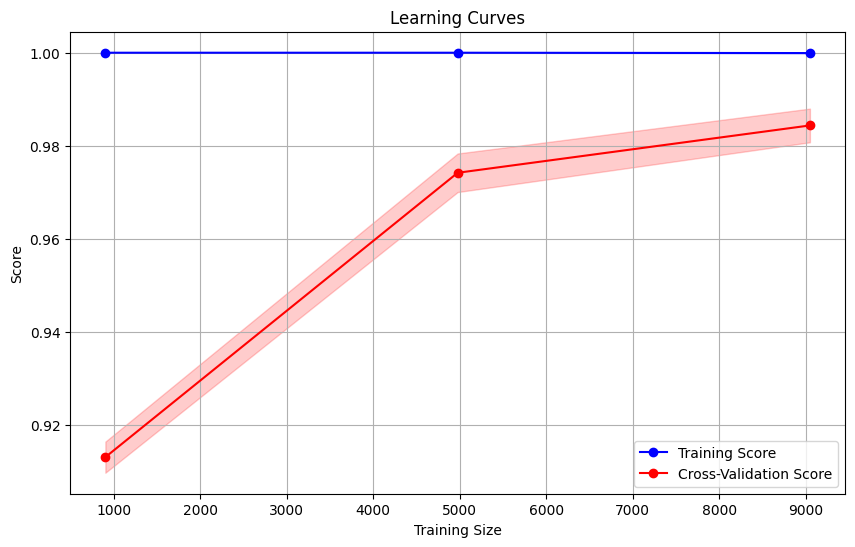

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score


# Define a scorer based on accuracy
scorer = make_scorer(accuracy_score)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb_model,
    X=X_train_res,
    y=y_train_res,
    train_sizes=np.linspace(0.1, 1.0, 3),  # Training set sizes (fraction of training data)
    scoring=scorer,
    n_jobs=-1,  # Use all available cores
    cv=3
)

# Calculate mean and std deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-Validation Score')

# Plot the std deviation as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


## Predictions on the test data

In [ ]:
y_test_res.value_counts()

,count
fraudulent,
0.0,1699
1.0,1695


In [ ]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test_res)

# Calculate all metrics
accuracy = accuracy_score(y_test_res, y_pred)
precision = precision_score(y_test_res, y_pred)
recall = recall_score(y_test_res, y_pred)
f1 = f1_score(y_test_res, y_pred)
roc_auc = roc_auc_score(y_test_res, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test_res, y_pred))

# Print individual metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1699
         1.0       0.98      1.00      0.99      1695

    accuracy                           0.99      3394
   macro avg       0.99      0.99      0.99      3394
weighted avg       0.99      0.99      0.99      3394

Accuracy: 0.9894
Precision: 0.9825
Recall: 0.9965
F1 Score: 0.9895
ROC AUC Score: 0.9894


## Accuracy on the test dataset

In [ ]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9894


## Classification Report

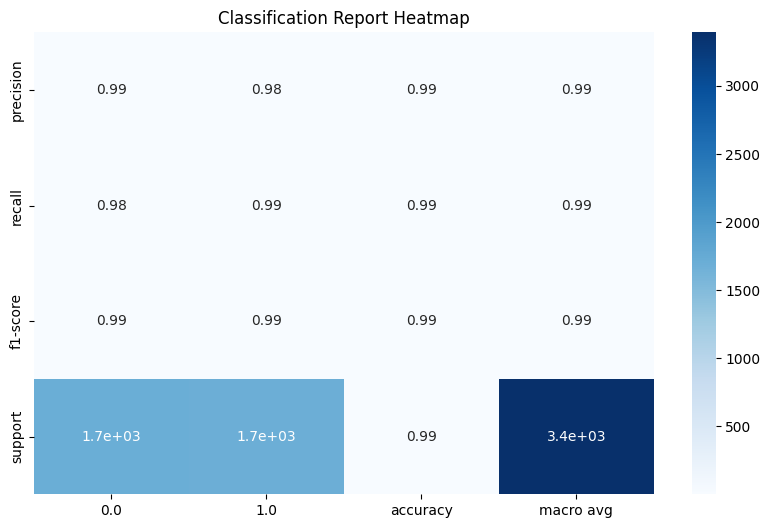

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report as a dictionary
report_dict = classification_report(y_test_res, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot a heatmap for the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')

plt.title('Classification Report Heatmap')
plt.show()